In [1]:
print(__doc__)

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import itertools

import time 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM


%matplotlib inline 

Automatically created module for IPython interactive environment


In [10]:
#change if necessary to get different clusters
np.random.seed(123)

#downloaded from UCI Machine Repository
input_file = pd.read_csv('./dr_outputs/News_EFA_output.csv', index_col=['Unnamed: 0'])
#input_file = input_file.drop(labels=['Unnamed: 0'], axis=1)
print input_file.head()
print len(input_file)

#set variables 
data = input_file
n_samples, n_features = data.shape
X = data
sample_size = 500

                           Factor1   Factor2   Factor3   Factor4   Factor5  \
n_tokens_title           -0.053436 -0.052318 -0.004791  0.006622 -0.009015   
n_tokens_content          0.214129 -0.041278  0.001954 -0.019182 -0.011861   
n_unique_tokens           0.004858 -0.001402  0.999070  0.001297 -0.004157   
n_non_stop_words          0.011082 -0.002494  0.998895  0.000751 -0.004555   
n_non_stop_unique_tokens  0.014184 -0.001780  0.998964  0.000978 -0.004680   

                           Factor6   Factor7   Factor8   Factor9  
n_tokens_title           -0.004232 -0.004719  0.016407  0.002520  
n_tokens_content          0.033658 -0.004681 -0.000362  0.009547  
n_unique_tokens           0.004271 -0.002030  0.000545  0.000822  
n_non_stop_words          0.004820 -0.002128  0.000534  0.001198  
n_non_stop_unique_tokens  0.003146 -0.001888  0.000662  0.000897  
59


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11301a7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11561f650>]], dtype=object)

/Users/paulinechow/Envs/ML-OMCS/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


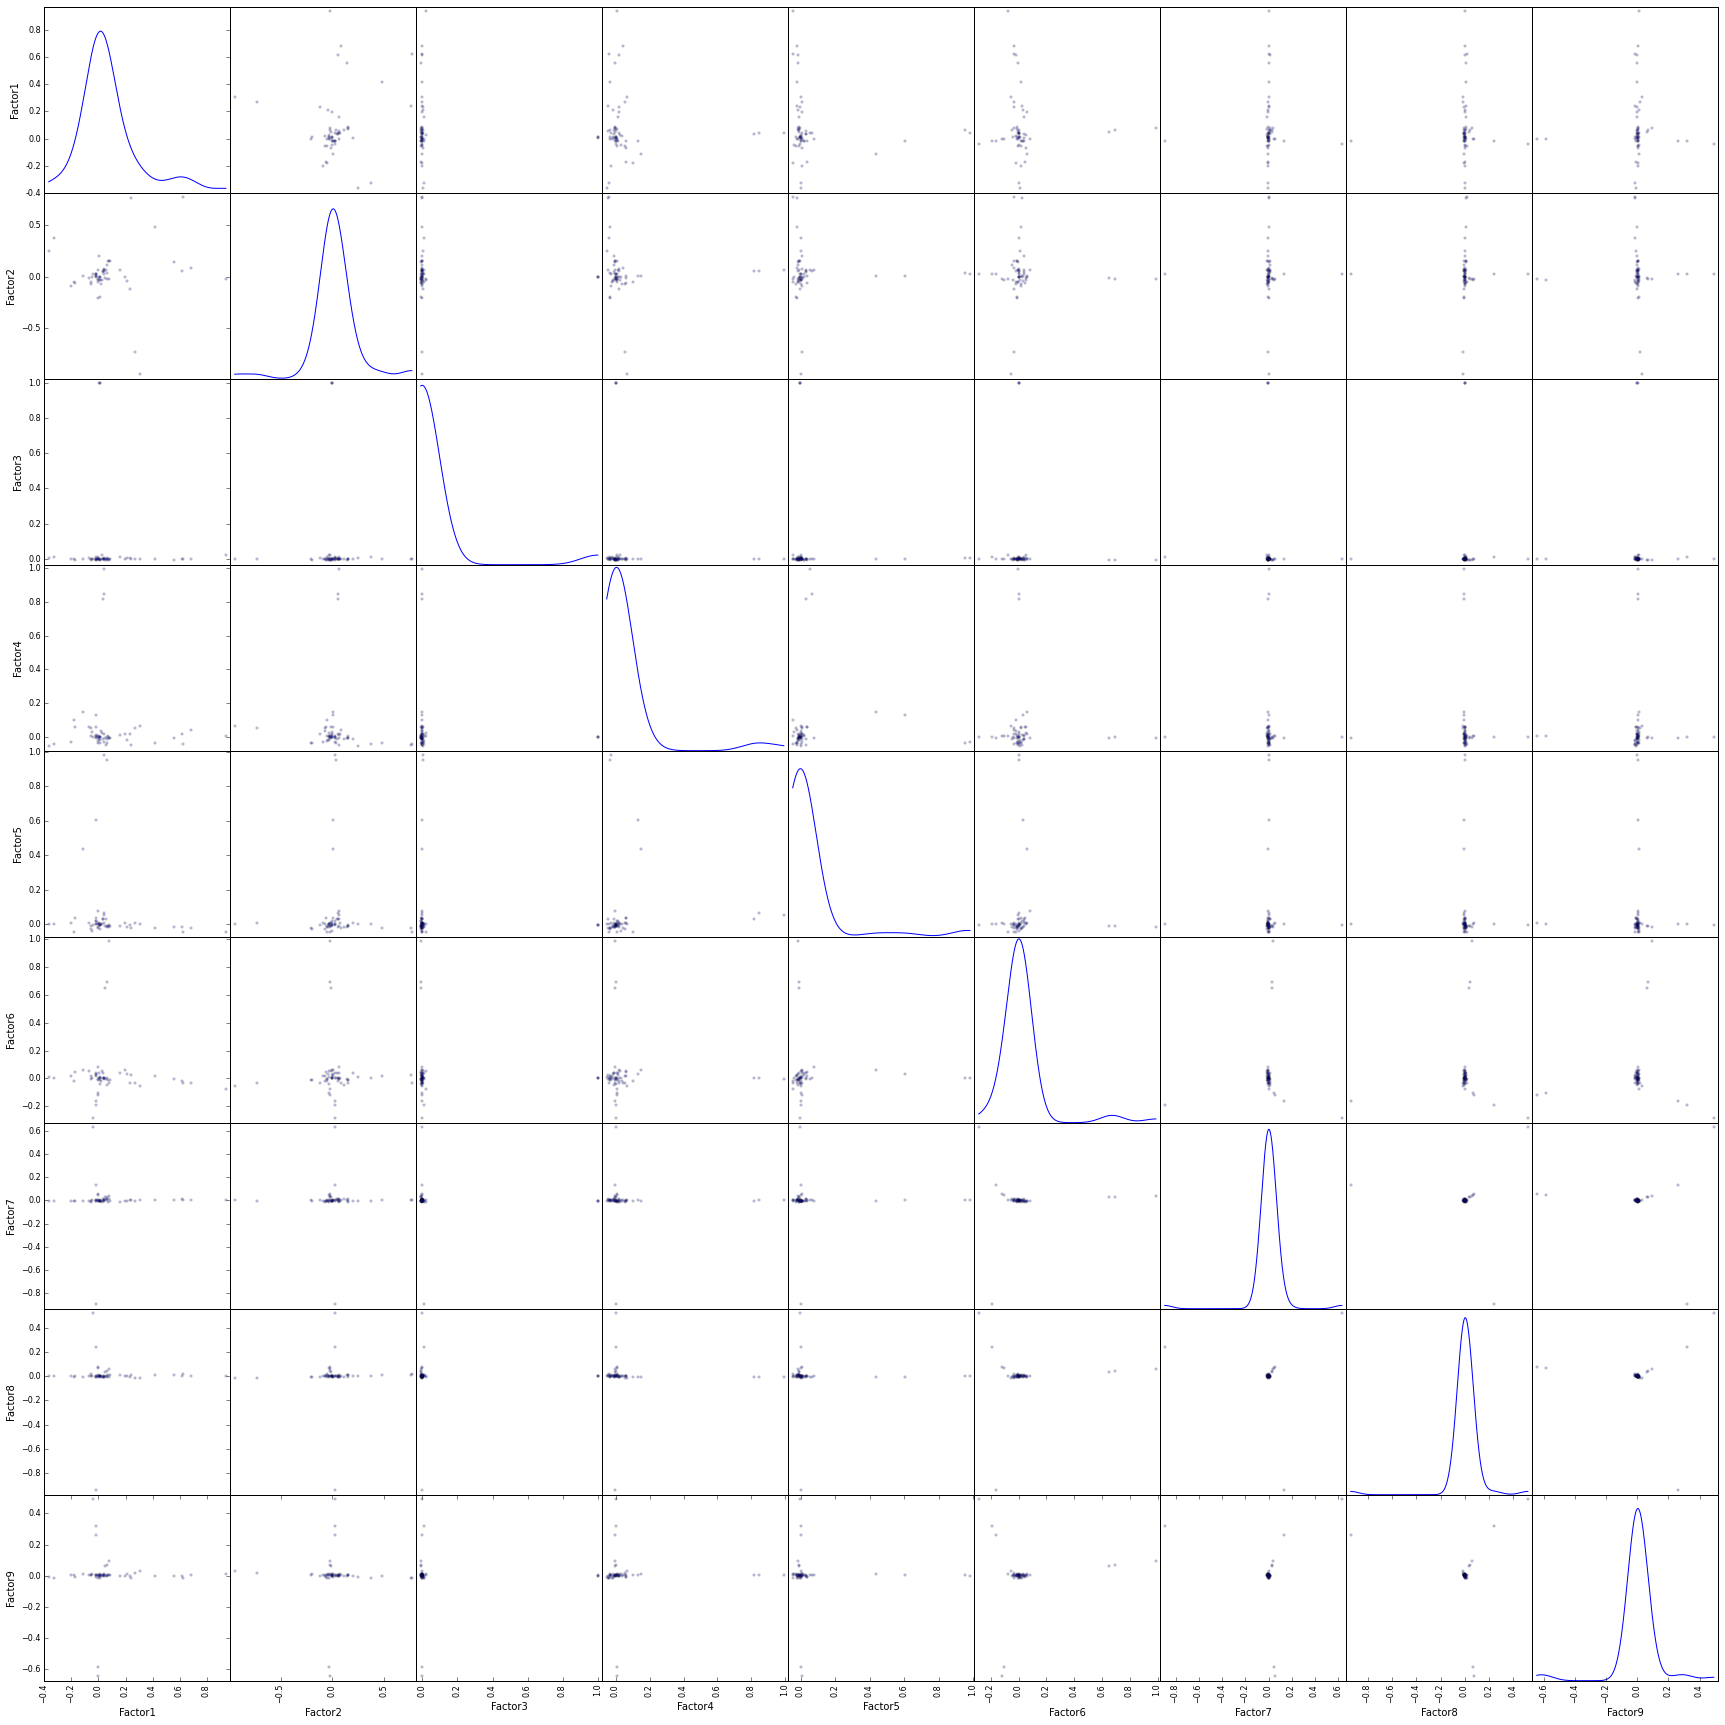

In [11]:
#Takes a long time to run -- not used in first part of the analysis
pd.scatter_matrix(X, alpha=0.2, figsize=(30, 30), diagonal='kde')

In [4]:
##### FUNCTIONS TO EVALUTE THE PERFORMANCE OF CLUSTERING AND DIFFERENCE DISTANCES 
#################################################################################
def k_means_scikit(matrix, n):
    k_means = skcluster.KMeans(n_clusters=n, init='k-means++',
                               n_init=1, verbose=0)
    k_means.fit(matrix)

    return k_means.labels_

def evaluate_performance(data, labels, metric='euclidean'):
    score = silhouette_score(data, labels, metric=metric)
    print('Score:', score)

    return score

def cluster_and_evaluate_data(matrix, metric='euclidean'):
    print('Clustering started')
    clustering_start = time.time()
    labels = k_means_scikit(matrix)
    clustering_total = time.time() - clustering_start
    print('Clustering time:', clustering_total)

    evaluation_start = time.time()
    score = evaluate_performance(matrix, labels, metric)
    evaluation_total = time.time() - evaluation_start
    print('Evaluation time:', evaluation_total)
    total = time.time() - clustering_start
    print('Total time:', total)

In [5]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,20)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k_euclidean = [cdist(X, cent, 'euclidean') for cent in centroids] 
D_k_seuclidean  = [cdist(X, cent, 'seuclidean') for cent in centroids] 
D_k_jaccard  = [cdist(X, cent, 'jaccard') for cent in centroids] 

# PC --- unsure of changing the distances here, sum of squares best fits and converges with Euclidean unsure how 
# to prove convergence of other distance and application of sum of squares 

#other distances can be found here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
#minkowski
#wminkowski -- weighted minkowski
#seuclidean -- standardized euclidean measure between two n-vectors
#sqeuclidean -- square euclidean
# cosin distance 
#correlation -- between vectors 
# print 'EUCLIDEAN ', D_k_euclidean
# print 'SEUCLIDEAN ', D_k_seuclidean
# print 'JACCARD ', D_k_seuclidean


In [6]:
#assign values based on distance measure above
cIdx_euclidean = [np.argmin(D,axis=1) for D in D_k_euclidean]
dist_euclidean = [np.min(D,axis=1) for D in D_k_euclidean]
avgWithinSS_euclidean = [sum(d)/X.shape[0] for d in dist_euclidean] 

cIdx_seuclidean = [np.argmin(D,axis=1) for D in D_k_seuclidean]
dist_seuclidean = [np.min(D,axis=1) for D in D_k_seuclidean]
avgWithinSS_seuclidean = [sum(d)/X.shape[0] for d in dist_seuclidean] 

cIdx_jaccard = [np.argmin(D,axis=1) for D in D_k_jaccard]
dist_jaccard = [np.min(D,axis=1) for D in D_k_jaccard]
avgWithinSS_jaccard = [sum(d)/X.shape[0] for d in dist_jaccard] 

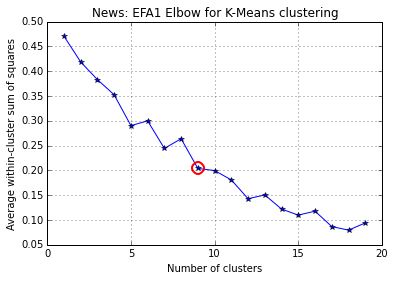

In [8]:
kIdx = 8
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS_euclidean, 'b*-')
ax.plot(K[kIdx], avgWithinSS_euclidean[kIdx], marker='o', markersize=12,          #plots a marker on the cluster
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('News: EFA1 Elbow for K-Means clustering')  

[1 1 7 7 7 1 1 1 1 3 1 1 1 1 1 1 1 1 5 5 1 1 1 1 5 5 2 2 2 1 1 8 6 1 4 4 4
 1 1 1 1 1 3 3 3 0 3 0 3 1 3 1 1 1 1 1 1 1 1]
Counter({1: 35, 3: 7, 5: 4, 2: 3, 4: 3, 7: 3, 0: 2, 6: 1, 8: 1})


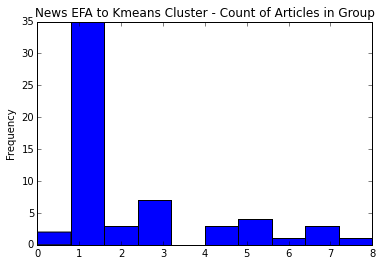

In [14]:
#input number being seen above
n_clusters = 9

##############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

y= k_means_labels
print k_means_labels

#Output clusters to file for next part of analysis
X['efa_kmeans_k9'] = k_means_labels
X.to_csv('news_kmeans2_efa_k9.csv', index=False)
X.efa_kmeans_k9.plot(kind='hist')
tt = plt.title('News EFA to Kmeans Cluster - Count of Articles in Group')  

from collections import Counter
freqs = Counter(k_means_labels)
print freqs

Index([u'Factor1', u'Factor2', u'Factor3', u'Factor4', u'Factor5', u'Factor6',
       u'Factor7', u'Factor8', u'Factor9'],
      dtype='object')


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


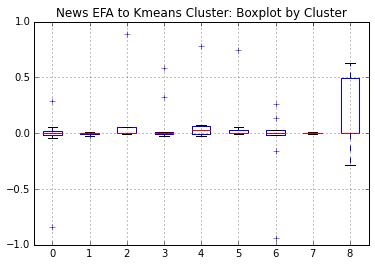

In [16]:
#Output results to csv for graphing and analysis in excel
grp_avg = X.groupby('efa_kmeans_k9').mean()
print grp_avg.columns
grp_avg.transpose().boxplot()
tt = plt.title('News EFA to Kmeans Cluster: Boxplot by Cluster')  

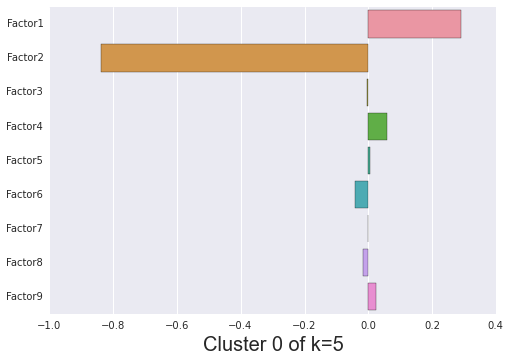

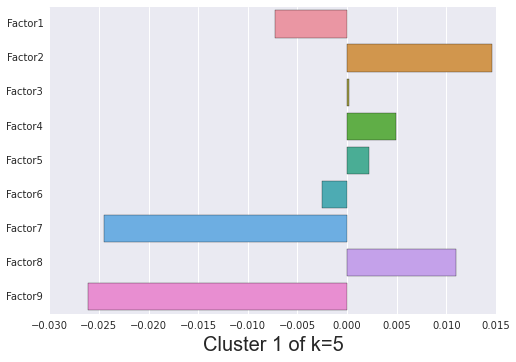

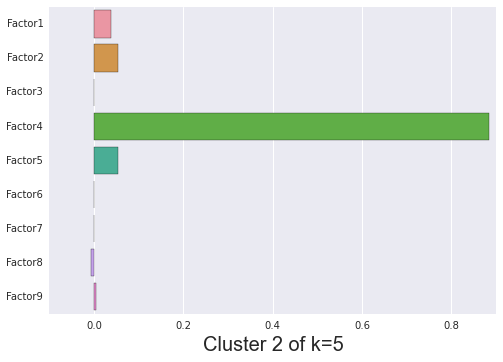

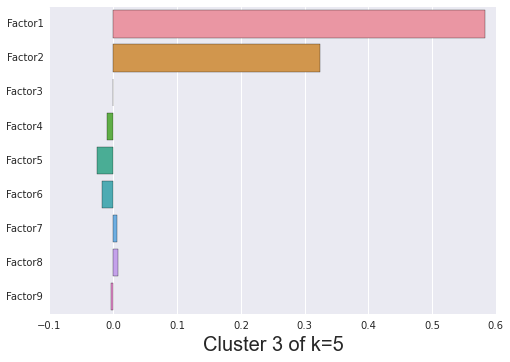

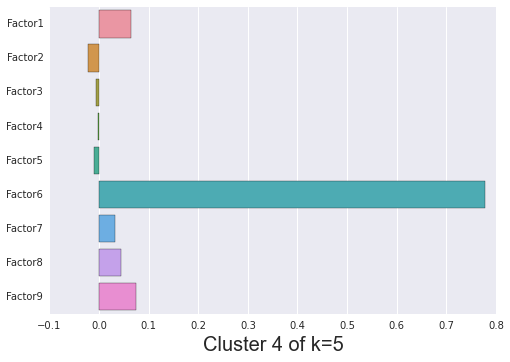

In [18]:
import seaborn as sns
#plot values each cluster label

X_sns = X.drop(labels=['efa_kmeans_k9'], axis=1)

def cluster_dashboard(clust_num, names):
    dash_list = zip(names, k_means.cluster_centers_[clust_num])
    x_val = [x[0] for x in dash_list]
    y_val = [x[1] for x in dash_list]
    dash_chart= sns.barplot(y_val, x_val, orient= 'h')
    plt.xlabel("Cluster "+ str(clust_num) +" of k=5", fontsize=20)

cluster_dashboard(0, X_sns.columns.tolist())
plt.show()
cluster_dashboard(1, X_sns.columns.tolist())
plt.show()
cluster_dashboard(2, X_sns.columns.tolist())
plt.show()
cluster_dashboard(3, X_sns.columns.tolist())
plt.show()
cluster_dashboard(4, X_sns.columns.tolist())
plt.show()


In [19]:
# GMM labels compared with Kmeans labeling
# Get values to plot and compare

np.random.seed(123)
cluster_range = [2,3,4,5,6,7,8,9,10]
sample_size = 500
news_data = X

for n_clusters in cluster_range: 

    k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    t0 = time.time()
    k_means.fit(news_data)
    t_batch = time.time() - t0
    k_means_labels = k_means.labels_
    k_means_cluster_centers = k_means.cluster_centers_
    
    g = GMM(n_components=n_clusters,covariance_type='spherical')
    g_t0 = time.time()
    g.fit(news_data)
    g_t_batch = time.time() - g_t0
    g_label_pred = g.predict(X)
    
    
    print('%.3f,  %.2fs,  %i,   %.3f,   %.3f,   %.3f,   %.3f,     %.3f'
      % (n_clusters,(time.time() - t0), 
         k_means.inertia_,
         metrics.homogeneity_score(k_means_labels, g_label_pred),
         metrics.completeness_score(k_means_labels, g_label_pred),
         metrics.v_measure_score(k_means_labels, g_label_pred),
         metrics.adjusted_rand_score(k_means_labels, g_label_pred),
         metrics.adjusted_mutual_info_score(k_means_labels,  g_label_pred)
        )
       )
      


2.000,  0.01s,  66,   0.378,   0.277,   0.319,   0.231,     0.267
3.000,  0.01s,  32,   0.661,   0.585,   0.621,   0.488,     0.567
4.000,  0.01s,  21,   0.886,   0.912,   0.899,   0.947,     0.876
5.000,  0.01s,  16,   0.963,   0.956,   0.960,   0.987,     0.950
6.000,  0.02s,  11,   1.000,   1.000,   1.000,   1.000,     1.000
7.000,  0.02s,  8,   1.000,   1.000,   1.000,   1.000,     1.000
8.000,  0.02s,  6,   1.000,   1.000,   1.000,   1.000,     1.000
9.000,  0.02s,  4,   1.000,   1.000,   1.000,   1.000,     1.000
10.000,  0.03s,  3,   1.000,   1.000,   1.000,   1.000,     1.000
